In [8]:
import numpy as np
import numpy.ma as ma
from scipy.special import jn, hankel2
from matplotlib import pyplot as plt
from numpy import (mgrid, ceil, amin, amax, cos, zeros_like,
                   pi, exp, sqrt, arctan2, log10)
from scipy.fft import ifft
from scipy.fft import fftshift
from matplotlib.colors import LightSource

In [14]:
def u(nmax, k, a, r, theta):
    u = zeros_like(k)
    for n in range(nmax, -1, -1):
        if n==0:
            an = -jn(1, k*a)/hankel2(1, k*a)
            en = 1.0
        else:
            an = -2.0*(-1.0)**n*((jn(n + 1, k*a) - jn(n - 1, k*a))/
                 (hankel2(n + 1, k*a) - hankel2(n - 1, k*a)))
            en = 2.0
        usn = an*1.0j**n*hankel2(n,k*r)*cos(n*theta)
        uin = en*1.0j**n*jn(n,-k*r)*cos(n*theta)
        u = u + usn + uin
    return u

def gen_disp(r, theta, k, nmax=50):
    return  u(nmax, k, 0.1, r, theta)

In [15]:
Y, X = np.mgrid[-10:10:501j, -10:10:501j]
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)
k = 1.0
disp = gen_disp(R, Theta, k)
savefig = False

KeyboardInterrupt: 

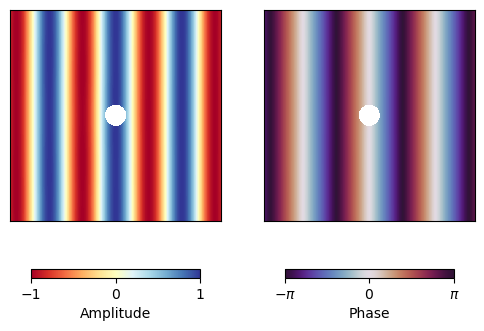

In [13]:
amp = ma.masked_where(R<1.0, np.real(disp))
phase = ma.masked_where(R<1.0, np.angle(disp))

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.pcolormesh(X, Y, amp, cmap="RdYlBu", vmin=-1, vmax=1)
cb = plt.colorbar(shrink=0.8, orientation="horizontal")
cb.set_label("Amplitude")
cb.set_ticks([-1, 0, 1])
plt.axis("image")
plt.yticks([])
plt.xticks([])

plt.subplot(1, 2, 2)
plt.pcolormesh(X, Y, phase, cmap="twilight_shifted", vmin=-np.pi,
               vmax=np.pi)
cb = plt.colorbar(shrink=0.8, orientation="horizontal")
cb.set_label("Phase")
cb.set_ticks([-np.pi, 0, np.pi])
cb.set_ticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
plt.axis("image")
plt.yticks([])
plt.xticks([])
plt.show()